<a href="https://colab.research.google.com/github/necronet/Notebooks/blob/master/DSP/Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2020-07-28 22:42:50--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2020-07-28 22:42:51--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48706 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.56K  --.-KB/s    in 0.03s   

2020-07-28 22:42:51 (1.85 MB/s) - ‘thinkdsp.py’ saved [48706/48706]



In [30]:

import numpy as np
import matplotlib.pyplot as plt
import thinkdsp
from thinkdsp import decorate, normalize, unbias

In [3]:
np.random.seed(10052019)

In [9]:
class UncorrelatedNoise(thinkdsp.Noise):
  def evaluate(self, ts):
    ys = np.random.uniform(-self.amp, self.amp, len(ts))
    return ys


In [14]:
noise_signal = UncorrelatedNoise()
noise_wave = noise_signal.make_wave(duration = 5, framerate = 11025)

In [15]:
noise_wave.make_audio()

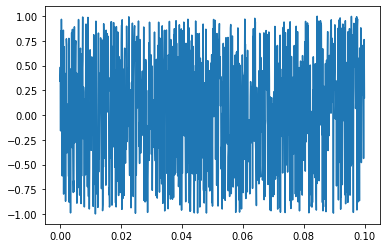

In [18]:
noise_wave.segment(start = 0, duration = .1).plot()

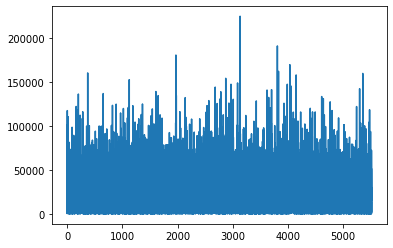

In [20]:
noise_wave.make_spectrum().plot_power()

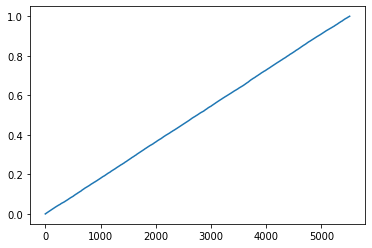

In [26]:
noise_wave.make_spectrum().make_integrated_spectrum().plot_power()

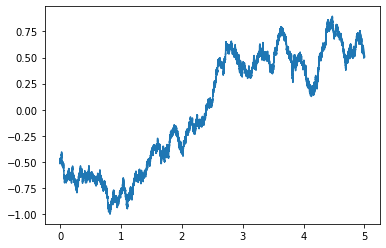

In [31]:
class BrownianNoise(thinkdsp.Noise):
  def evaluate(self, ts):
    dys = np.random.uniform(-1, 1, len(ts))
    ys = np.cumsum(dys)
    return normalize(unbias(ys), self.amp)

brownian_signal = BrownianNoise()
brownian_wave = brownian_signal.make_wave(duration = 5, framerate = 11025)
brownian_wave.plot()

In [32]:
brownian_wave.make_audio()

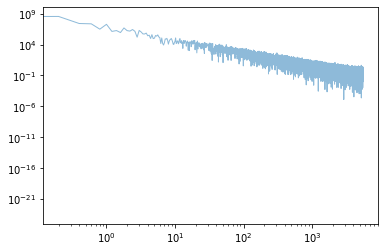

In [36]:
brownian_wave.make_spectrum().plot_power(linewidth = 1, alpha = 0.5)
plt.xscale('log')
plt.yscale('log')